## Problem Statement - McDonald's Customer Sentiment Analysis

<div style="display: flex;">
  <div style="flex: 1; padding-right: 20px;">
  <p>
    McDonald's, as a global fast-food chain, continuously receives feedback from customers through reviews, social media comments, and surveys. Customer sentiment analysis involves extracting emotions, opinions, and attitudes expressed in this feedback to understand customer satisfaction, predict behavior, and identify areas for improvement.
  </p>
  <p>
    In this project, we aim to:
  </p>
  <ul>
    <li>Analyze customer feedback related to McDonald's food, service, and experience to determine whether the sentiment is positive, negative, or neutral.</li>
    <li>Use natural language processing (NLP) techniques and machine learning models to classify customer sentiments.</li>
    <li>Identify key drivers for satisfaction or dissatisfaction, such as menu items, delivery speed, service quality, or pricing.</li>
  </ul>
  </div>
  <div style="flex: 1;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/McDonald%27s_logo.svg/2560px-McDonald%27s_logo.svg.png" 
         alt="McDonald's Fast Food Sign" style="max-width: 75%; height: auto;" />
  </div>
</div>


In [2]:
import pandas as pd
import numpy as np
import json
import requests

# Basic setup
# pd.set_option('display.max_rows', None)  # None means no limit
# pd.set_option('display.max_columns', None)  # None means no limit

# Reading the data from csv file
mcReviews = pd.read_csv('McDonald_s_Reviews.csv', encoding_errors="ignore")
mcReviews




,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
2,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
3,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
4,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
...,...,...,...,...,...,...,...,...,...,...
883,881,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",4 years ago,"I like McDonald���������������������������s, j...",1 star
884,882,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",a year ago,Slow service inside take out.for breakfast.. w...,3 stars
885,883,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",4 years ago,I eat fast food maybe once a month. Have been ...,1 star
886,884,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",2 years ago,"Wind Gap, PA location was surprisingly better ...",4 stars


 #### Adding city name to the table from ```bigdatacloud``` api by passing latitude and lingitude from the table

In [3]:
def getCity(row):
    lat = row[2]
    lng = row[3]
    res = requests.get('https://api.bigdatacloud.net/data/reverse-geocode-client?latitude=51.536163954199395&longitude=-0.09365537155829527')
    return res.json()['city']

mcReviews['city'] = mcReviews.apply(lambda row: getCity(row), axis=1)
mcReviews


C:\Users\HP\AppData\Local\Temp\ipykernel_22236\1886509763.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lat = row[2]
C:\Users\HP\AppData\Local\Temp\ipykernel_22236\1886509763.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lng = row[3]


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,city
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,London
1,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,London
2,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,London
3,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,London
4,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,London
...,...,...,...,...,...,...,...,...,...,...,...
883,881,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",4 years ago,"I like McDonald���������������������������s, j...",1 star,London
884,882,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",a year ago,Slow service inside take out.for breakfast.. w...,3 stars,London
885,883,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",4 years ago,I eat fast food maybe once a month. Have been ...,1 star,London
886,884,McDonald's,Fast food restaurant,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,-91.919243,"1,028",2 years ago,"Wind Gap, PA location was surprisingly better ...",4 stars,London


#### Dropping unnessary columns from the table

In [3]:
mcReviews = mcReviews.drop(['store_name', 'category', 'latitude', 'longitude'], axis=1, errors='ignore')
mcReviews

,reviewer_id,store_address,latitude,rating_count,review_time,review,rating,city
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Pune
1,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Pune
2,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Pune
3,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Pune
4,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,Pune
...,...,...,...,...,...,...,...,...
883,881,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",4 years ago,"I like McDonald���������������������������s, j...",1 star,Pune
884,882,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",a year ago,Slow service inside take out.for breakfast.. w...,3 stars,Pune
885,883,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",4 years ago,I eat fast food maybe once a month. Have been ...,1 star,Pune
886,884,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",2 years ago,"Wind Gap, PA location was surprisingly better ...",4 stars,Pune


#### 1. Handlling missing values and duplicates

In [ ]:
# 1.1 Missing Values
missingValues = mcReviews.isnull().sum()
missingValuesf

reviewer_id      0
store_address    0
latitude         0
rating_count     0
review_time      0
review           0
rating           0
city             0
dtype: int64

In [5]:
# 1.2 Drop rows with any missing values
mcReviewsCleaned = mcReviews.dropna()
mcReviewsCleaned

,reviewer_id,store_address,latitude,rating_count,review_time,review,rating,city
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Pune
1,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Pune
2,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Pune
3,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,Pune
4,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,Pune
...,...,...,...,...,...,...,...,...
883,881,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",4 years ago,"I like McDonald���������������������������s, j...",1 star,Pune
884,882,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",a year ago,Slow service inside take out.for breakfast.. w...,3 stars,Pune
885,883,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",4 years ago,I eat fast food maybe once a month. Have been ...,1 star,Pune
886,884,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,"1,028",2 years ago,"Wind Gap, PA location was surprisingly better ...",4 stars,Pune


#### Converting feature rating_count to integer

In [6]:
mcReviews['rating_count'] = mcReviews['rating_count'].apply(lambda x: int(x.replace(',', '')))
mcReviews

,reviewer_id,store_address,latitude,rating_count,review_time,review,rating,city
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,3 months ago,Why does it look like someone spit on my food?...,1 star,Pune
1,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,3 months ago,Why does it look like someone spit on my food?...,1 star,Pune
2,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,3 months ago,Why does it look like someone spit on my food?...,1 star,Pune
3,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,3 months ago,Why does it look like someone spit on my food?...,1 star,Pune
4,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,Pune
...,...,...,...,...,...,...,...,...
883,881,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,1028,4 years ago,"I like McDonald���������������������������s, j...",1 star,Pune
884,882,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,1028,a year ago,Slow service inside take out.for breakfast.. w...,3 stars,Pune
885,883,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,1028,4 years ago,I eat fast food maybe once a month. Have been ...,1 star,Pune
886,884,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,1028,2 years ago,"Wind Gap, PA location was surprisingly better ...",4 stars,Pune


#### 2. Handling duplicates

In [7]:
# 2.1 Check for duplicate store_address
duplicates = mcReviews['reviewer_id'].duplicated().sum()
duplicates

np.int64(3)

In [8]:
# 2.2 Remove duplicate reviewers from the table
mcReviews.drop_duplicates(subset=['reviewer_id'], inplace=True)
mcReviews


,reviewer_id,store_address,latitude,rating_count,review_time,review,rating,city
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,3 months ago,Why does it look like someone spit on my food?...,1 star,Pune
4,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,Pune
5,3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,5 days ago,Made a mobile order got to the speaker and che...,1 star,Pune
6,4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,a month ago,My mc. Crispy chicken sandwich was �����������...,5 stars,Pune
7,5,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,Pune
...,...,...,...,...,...,...,...,...
883,881,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,1028,4 years ago,"I like McDonald���������������������������s, j...",1 star,Pune
884,882,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,1028,a year ago,Slow service inside take out.for breakfast.. w...,3 stars,Pune
885,883,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,1028,4 years ago,I eat fast food maybe once a month. Have been ...,1 star,Pune
886,884,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,1028,2 years ago,"Wind Gap, PA location was surprisingly better ...",4 stars,Pune


#### 3. Handling Categorical Values

In [9]:
# Alternatively, list only categorical columns
categorical_cols = mcReviews.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['store_address', 'review_time', 'review', 'rating', 'city'], dtype='object')


In [10]:
# Conveting feature 'rating' into integer
mcReviews['rating'] = mcReviews['rating'].apply(lambda x: int(x.split()[0]))
mcReviews

,reviewer_id,store_address,latitude,rating_count,review_time,review,rating,city
0,1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,3 months ago,Why does it look like someone spit on my food?...,1,Pune
4,2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,5 days ago,It'd McDonalds. It is what it is as far as the...,4,Pune
5,3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,5 days ago,Made a mobile order got to the speaker and che...,1,Pune
6,4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,a month ago,My mc. Crispy chicken sandwich was �����������...,5,Pune
7,5,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,1240,2 months ago,"I repeat my order 3 times in the drive thru, a...",1,Pune
...,...,...,...,...,...,...,...,...
883,881,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,1028,4 years ago,"I like McDonald���������������������������s, j...",1,Pune
884,882,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,1028,a year ago,Slow service inside take out.for breakfast.. w...,3,Pune
885,883,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,1028,4 years ago,I eat fast food maybe once a month. Have been ...,1,Pune
886,884,"1698 US-209, Brodheadsville, PA 18322, United ...",32.778889,1028,2 years ago,"Wind Gap, PA location was surprisingly better ...",4,Pune


#### 4. Detection of outliers using box plot

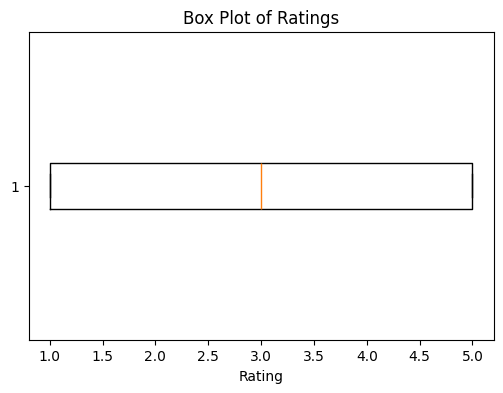

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(mcReviews['rating'], vert=False)
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')

plt.show()

<Axes: >

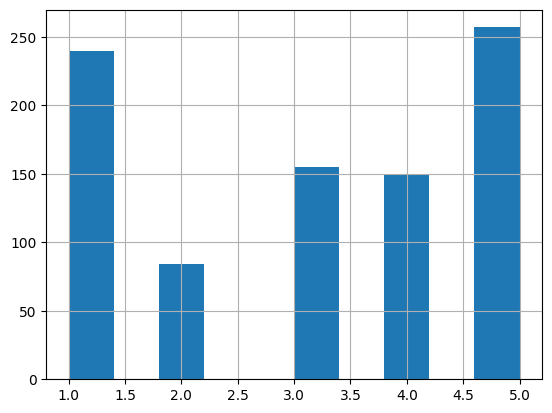

In [12]:
# Showing raitngs
mcReviews['rating'].hist(bins=10)

In [13]:
# Select the numeric columns
numeric_cols = ['rating']

# Calculate descriptive statistics
stats = {
    'Mean': mcReviews[numeric_cols].mean(),
    'Median': mcReviews[numeric_cols].median(),
    'Mode': mcReviews[numeric_cols].mode().iloc[0], 
    'Range': mcReviews[numeric_cols].max() - mcReviews[numeric_cols].min(),
    'IQR': mcReviews[numeric_cols].quantile(0.75) - mcReviews[numeric_cols].quantile(0.25),
    'Variance': mcReviews[numeric_cols].var(),
    'Standard Deviation': mcReviews[numeric_cols].std(),
    'Coefficient of Variation': mcReviews[numeric_cols].std() / mcReviews[numeric_cols].mean(),
    'Mean Absolute Deviation': (mcReviews[numeric_cols] - mcReviews[numeric_cols].mean()).abs().mean()

}

# Display the statistics
for stat, value in stats.items():
    print(f"\n{stat}:\n{value}")


Mean:
rating    3.111864
dtype: float64

Median:
rating    3.0
dtype: float64

Mode:
rating    5
Name: 0, dtype: int64

Range:
rating    4
dtype: int64

IQR:
rating    4.0
dtype: float64

Variance:
rating    2.499916
dtype: float64

Standard Deviation:
rating    1.581112
dtype: float64

Coefficient of Variation:
rating    0.508092
dtype: float64

Mean Absolute Deviation:
rating    1.395668
dtype: float64


#### 6. Data Aggreation

In [14]:
# Getting stats of rating and rating_count
aggregatedStats = mcReviews.agg({
    'rating': ['sum', 'mean', 'min', 'max'],
    'rating_count': ['sum', 'mean', 'min', 'max'],
})

aggregatedStats

,rating,rating_count
sum,2754.000000,1.079380e+06
mean,3.111864,1.219638e+03
min,1.000000,1.028000e+03
max,5.000000,1.240000e+03


In [15]:
mcReviews.groupby("city")['rating'].mean()

city
Pune    3.111864
Name: rating, dtype: float64

#### 7. Classification-Based-Dataset

##### 7.1. To tokenize the words

In [16]:
import spacy

# Load the small English model
nlp = spacy.load("en_core_web_sm")

# Function to preprocess text using spaCy
def preprocess_text(text):
    doc = nlp(text)  # Process the text with spaCy
    tokens = [token.text for token in doc]  # Extract tokens
    return tokens

# Apply the function to the 'review' column in the DataFrame
mcReviews['tokens'] = mcReviews['review'].apply(preprocess_text)

# Display the DataFrame with the new 'tokens' column
mcReviews['tokens']

0      [Why, does, it, look, like, someone, spit, on,...
4      [It, 'd, McDonalds, ., It, is, what, it, is, a...
5      [Made, a, mobile, order, got, to, the, speaker...
6      [My, mc, ., Crispy, chicken, sandwich, was, �,...
7      [I, repeat, my, order, 3, times, in, the, driv...
                             ...                        
883    [I, like, McDonald, �, �, �, �, �, �, �, �, �,...
884    [Slow, service, inside, take, out.for, breakfa...
885    [I, eat, fast, food, maybe, once, a, month, .,...
886    [Wind, Gap, ,, PA, location, was, surprisingly...
887    [I, do, n't, believe, they, were, busy, when, ...
Name: tokens, Length: 885, dtype: object

##### 7.2. Infering whether the statement is positive or negative

In [17]:
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import string

# Load the small English model
nlp = spacy.load("en_core_web_sm")

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to preprocess text
def preprocess_text(text):
    doc = nlp(text.lower())  # Convert to lowercase for uniformity
    tokens = [
        token.lemma_ for token in doc 
        if token.text not in nlp.Defaults.stop_words  # Exclude stopwords
        and token.text not in string.punctuation  # Exclude punctuation
        and not token.is_space  # Exclude spaces
    ]
    return " ".join(tokens)  # Join the filtered tokens

# Function to determine sentiment using VADER
def get_sentiment(review):
    # Use VADER to analyze the sentiment
    sentiment_score = analyzer.polarity_scores(review)
    # Determine sentiment based on compound score
    if sentiment_score['compound'] > 0.05:
        return 'Positive'
    elif sentiment_score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply preprocessing
mcReviews['processed_review'] = mcReviews['review'].apply(preprocess_text)

# Apply the sentiment analysis function
mcReviews['sentiment'] = mcReviews['processed_review'].apply(get_sentiment)

# Display some results
mcReviews[['review', 'processed_review', 'sentiment']]

,review,processed_review,sentiment
0,Why does it look like someone spit on my food?...,look like spit food normal transaction chill p...,Positive
4,It'd McDonalds. It is what it is as far as the...,mcdonald far food atmosphere staff difference ...,Positive
5,Made a mobile order got to the speaker and che...,mobile order get speaker check line move leave...,Negative
6,My mc. Crispy chicken sandwich was �����������...,mc crispy chicken sandwich � � � � � � � � � �...,Neutral
7,"I repeat my order 3 times in the drive thru, a...",repeat order 3 time drive manage mess suppose ...,Negative
...,...,...,...
883,"I like McDonald���������������������������s, j...",like mcdonald � � � � � � � � � � � � � � � � ...,Positive
884,Slow service inside take out.for breakfast.. w...,slow service inside out.for breakfast .. wait ...,Negative
885,I eat fast food maybe once a month. Have been ...,eat fast food maybe month mcdonald dozen time ...,Negative
886,"Wind Gap, PA location was surprisingly better ...",wind gap pa location surprisingly well covid 1...,Positive


C:\Users\HP\AppData\Local\Temp\ipykernel_10272\1550187633.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


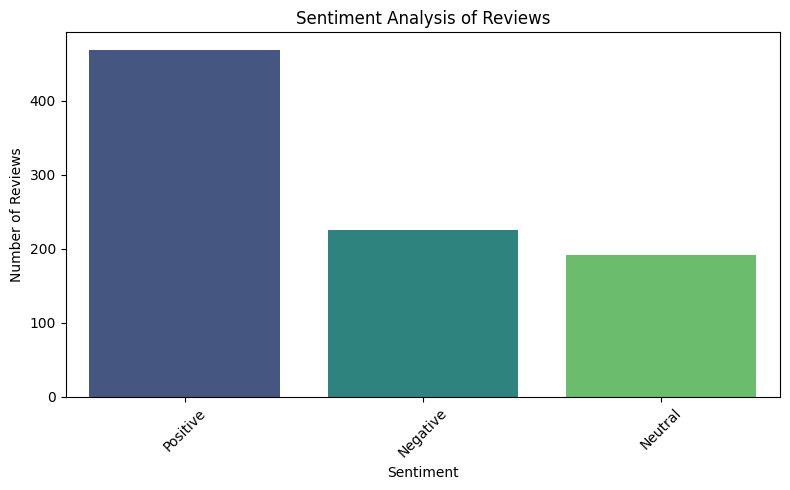

In [18]:
import seaborn as sns

sentiment_counts = mcReviews['sentiment'].value_counts()

# Set up the plot
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()